In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
play_tennis = pd.read_csv("PlayTennis.csv")

In [3]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny','Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']
humidity=['high','high','high','high','normal','normal','normal','high','normal','normal','normal','high','normal','high']
windy=['False','True','False','False','False','True','True','False','False','False','True','True','False','True']
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [4]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
weather_encoded=le.fit_transform(weather)
print(weather_encoded)
temp_encoded=le.fit_transform(temp)
print(temp_encoded)
humidity_encoded=le.fit_transform(humidity)
print(humidity_encoded)
windy_encoded=le.fit_transform(windy)
print(windy_encoded)
#play_encoded=le.fit_transform(play)
#print(play_encoded)
label=le.fit_transform(play)
print(label)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]
[1 1 1 2 0 0 0 2 0 2 2 2 1 2]
[0 0 0 0 1 1 1 0 1 1 1 0 1 0]
[0 1 0 0 0 1 1 0 0 0 1 1 0 1]
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [5]:
number = LabelEncoder()
play_tennis['Outlook'] = number.fit_transform(play_tennis['Outlook'])
play_tennis['Temperature'] = number.fit_transform(play_tennis['Temperature'])
play_tennis['Humidity'] = number.fit_transform(play_tennis['Humidity'])
play_tennis['Wind'] = number.fit_transform(play_tennis['Wind'])
play_tennis['Play Tennis'] = number.fit_transform(play_tennis['Play Tennis'])
print("outlook")
print(play_tennis['Outlook'])
print("temp")
print(play_tennis['Temperature'])
print("humid")
print(play_tennis['Humidity'])
print("wind")
print(play_tennis['Wind'])

outlook
0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: Outlook, dtype: int64
temp
0     1
1     1
2     1
3     2
4     0
5     0
6     0
7     2
8     0
9     2
10    2
11    2
12    1
13    2
Name: Temperature, dtype: int64
humid
0     0
1     0
2     0
3     0
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    0
Name: Humidity, dtype: int64
wind
0     1
1     0
2     1
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    0
11    0
12    1
13    0
Name: Wind, dtype: int64


In [6]:
features = ["Outlook", "Temperature", "Humidity", "Wind"]
target = "Play Tennis"
target

'Play Tennis'

In [7]:
features_train, features_test, target_train, target_test = train_test_split(play_tennis[features],
play_tennis[target],
test_size = 0.33,
random_state = 54)


In [8]:
model = GaussianNB()
model.fit(features_train, target_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)
print(accuracy)
pred


0.8


array([1, 1, 1, 1, 1])

In [10]:
#Rainy, cool,normal,weak --play yes

print( model.predict([[2,2,1,0]]))


[1]


In [12]:
#Rainy, cool,normal,strong --play NO
print( model.predict([[2,2,1,1]]))

[0]


In [13]:
#overcast,hot,high,weak --play YES
print( model.predict([[1,0,1,0]]))

[1]


In [14]:

conf=confusion_matrix(target_test,pred)
conf

array([[0, 1],
       [0, 4]])

Text(0.5, 15.0, 'Predicted label')

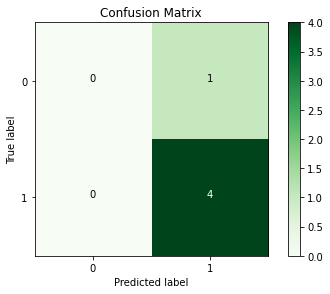

In [15]:
classes = [0, 1]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [16]:
TP = true_pos =1
TN = true_neg = 1
FP = false_pos = 4
FN = false_neg = 1

In [17]:
results = {}
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Sensitivity or Recall
# Sensitivity or Recall
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")
# Specificity
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")
# Precision
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

ACC is  0.286
TPR is  0.500
TNR is  0.200
PPV is  0.200
NPV is  0.500
F1 is  0.286
MCC is -0.300
